Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
2.8.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                   

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

50/50 [==============================] - 214s 4s/step - loss: 0.7054 - accuracy: 0.6479 - val_loss: 0.7436 - val_accuracy: 0.6580
Epoch 8/30
50/50 [==============================] - 198s 4s/step - loss: 0.7032 - accuracy: 0.6638 - val_loss: 0.6987 - val_accuracy: 0.6540
Epoch 9/30
50/50 [==============================] - 189s 4s/step - loss: 0.6921 - accuracy: 0.6681 - val_loss: 0.7880 - val_accuracy: 0.6270
Epoch 10/30
50/50 [==============================] - 182s 4s/step - loss: 0.6344 - accuracy: 0.6972 - val_loss: 0.8803 - val_accuracy: 0.6090
Epoch 11/30
50/50 [==============================] - 177s 4s/step - loss: 0.6331 - accuracy: 0.7056 - val_loss: 0.6660 - val_accuracy: 0.7070
Epoch 12/30
50/50 [==============================] - 170s 3s/step - loss: 0.6074 - accuracy: 0.7128 - val_loss: 0.6542 - val_accuracy: 0.7140
Epoch 13/30
50/50 [==============================] - 166s 3s/step - loss: 0.6117 - accuracy: 0.7212 - val_loss: 0.6587 - val_accuracy: 0.7120
Epoch 14/30
50/50 [=

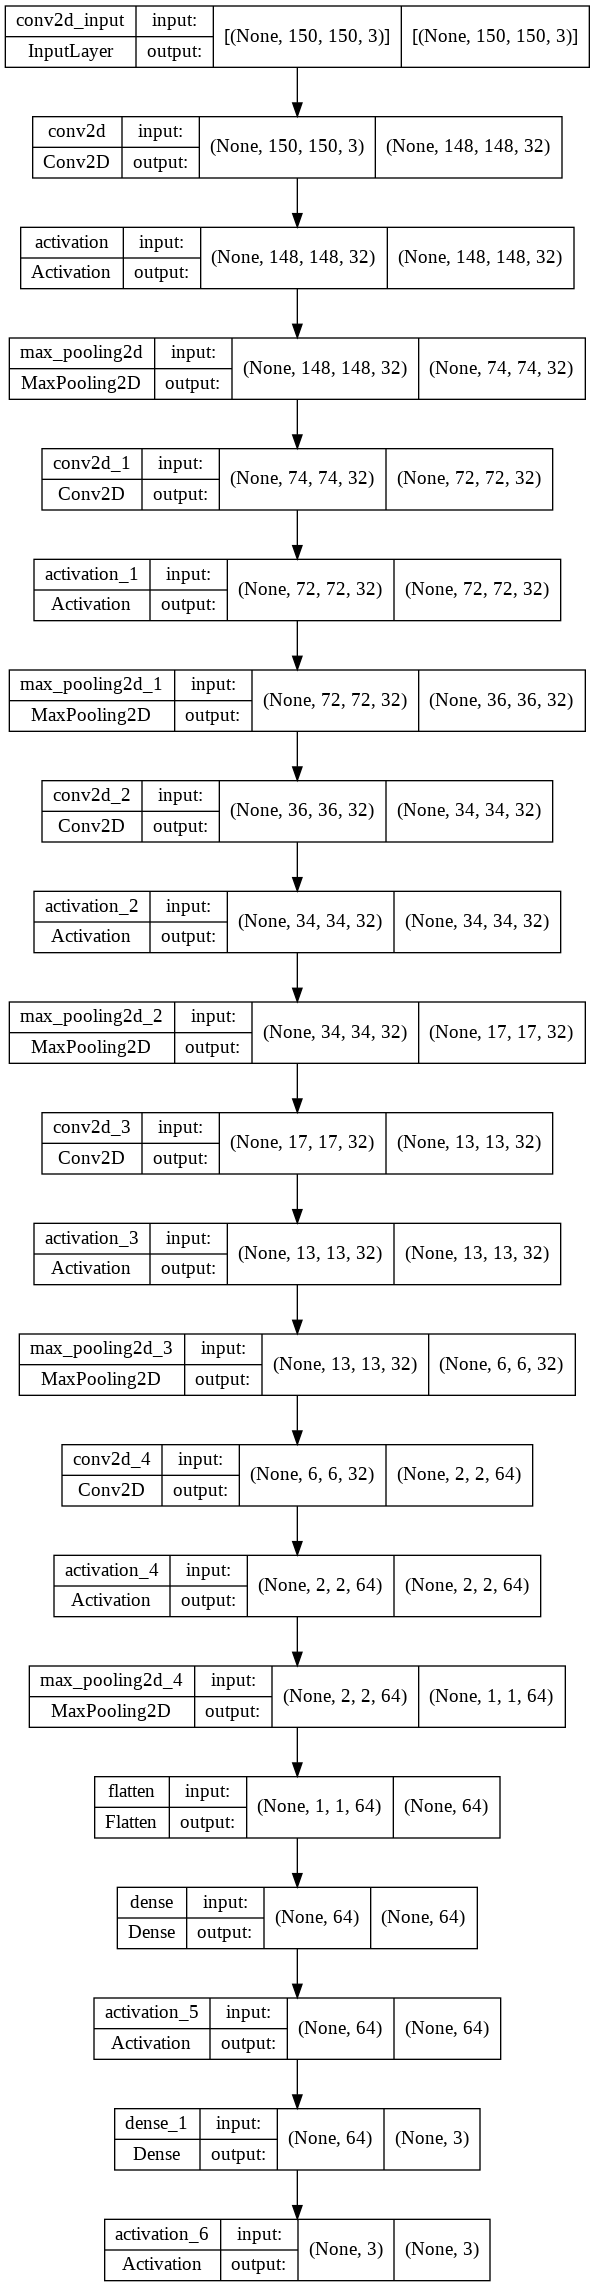

In [ ]:
# using tf.2.1 in colab
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2

from google.colab import drive
drive.mount('/content/gdrive')
# sanity check for the tf version
print(tf.__version__)

###################################################################################################
# Define image size for network model -- all input images are scaled to this size.
###################################################################################################   
img_width, img_height = 150, 150

###################################################################################################
# Include pointers to training and validation data folders -- be sure to examine subfolder structure
# --> I also define the # of training samples, validation samples, epochs, and batch size here.
###################################################################################################   
train_data_dir = '/content/gdrive/My Drive/cse-30321-lab2/Datasets/data/train'
validation_data_dir = '/content/gdrive/My Drive/cse-30321-lab2/Datasets/data/validation'
nb_train_samples = 5000
nb_validation_samples = 1000
epochs = 30
batch_size = 100

###################################################################################################
# As before, this code simply organizes input data such that channels either come first or last
# depending on the backend used (TensorFlow or Theano)
###################################################################################################   
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

###################################################################################################
# Define our CNN model
###################################################################################################
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

################################################
#Layer 2
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Layer 3
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Layer 4
model.add(Conv2D(32, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Layer 5
model.add(Conv2D(64, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


################################################

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

###################################################################################################
# To process images in respective directories, we can use the ImageDataGenerator class
#	The code provided here normalizes image data, etc.
#	The parameters will not be discussed further here, 
#    but more information / options can be found at:  https://keras.io/preprocessing/image/ 
###################################################################################################   
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

###################################################################################################
# This is the augmentation configuration we will use for testing:  only rescaling
###################################################################################################
test_datagen = ImageDataGenerator(rescale=1. / 255)

###################################################################################################
# Subsequent invocations of flow_from_directory() will use the paths to the training and validation 
# data, and generate batches of data
# 
# Note that if you wanted to work with grayscale images (for example) you could simply change 
# color_mode to ‘gray_scale’ (and the number of color channels)
# 
# Again, you will not need to change any parameters here, but a more detailed description of this 
# class can also be found at the link above.
###################################################################################################
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

###################################################################################################
# Finally, the invocation of model.fit_generator will simply train the model on batches of data.  
# More information can be found at:  https://keras.io/models/sequential/
# --> However, this is just analogous to model.fit() discussed in other examples.
###################################################################################################

history = model.fit(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

import pandas as pd
hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/gdrive/My Drive/cse-30321-lab2/dogs_cats_birds_model_case01_30epoch.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

###################################################################################################
# Here, we save the model weights and generate an image of the network...
###################################################################################################
model.save('/content/gdrive/My Drive/cse-30321-lab2/dogs_cats_birds_model_case01_30epoch')

plot_model(model, to_file='/content/gdrive/My Drive/cse-30321-lab2/dogs_cats_birds_model_case01.png', show_shapes=True, show_layer_names=True)
